# k-Nearest Neighbors Exercise

The k-Nearest Neighbors (KNN) algorithm is very simple and very effective. In this chapter you will discover exactly how to implement it from scratch, step-by-step.

After reading this chapter you will know:
- How to calculate the Euclidean distance between real valued vectors.
- How to use Euclidean distance and the training dataset to make predictions for new data.

---

## 1. Exercise Dataset
The problem is a binary (two-class) classification problem. This problem was contrived for this exercise. The dataset contains two input variables ($X1$ and $X2$) and the class output variable
with the values 0 and 1. The dataset contains 10 records, 5 that belong to each class.

- Load the dataset from *data.csv* and produce the Scatter plot of the results as shown below.
  
  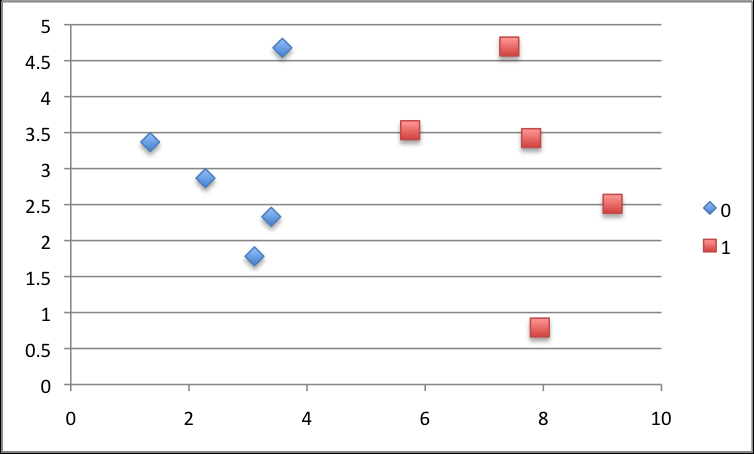

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('data.csv')
data

,X1,X2,Y
0,3.393533,2.331273,0
1,3.110073,1.781540,0
2,1.343809,3.368361,0
3,3.582294,4.679179,0
4,2.280362,2.866990,0
5,7.423437,4.696523,1
6,5.745052,3.533990,1
7,9.172169,2.511101,1
8,7.792783,3.424089,1
9,7.939821,0.791637,1


In [15]:
X1[Y == 0]

0    3.393533
1    3.110073
2    1.343809
3    3.582294
4    2.280362
Name: X1, dtype: float64

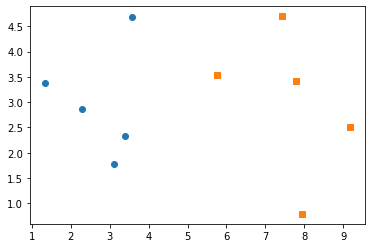

In [16]:
X1, X2, Y = data['X1'], data['X2'], data['Y']

for y in [0,1]:
    
    plt.scatter(X1[Y == y],
               X2[Y == y],
               marker = 'o' if y == 0 else 's',
               label = f'Class {y}')

You can see that the data for each class is quite separated. This is intentionally to make the problem easy to work with so that we can focus on the learning algorithm.

---

## 2. KNN and Euclidean Distance

KNN uses a distance measure to locate the $k$ most similar instances from the training dataset when making a prediction. The distance measure selected must respect the structure of the problem so that data instances that are close to each other according to the distance measure also belong to the same class. The most common distance measure for real values that have the same units or scale is the Euclidean distance. Euclidean distance is calculated as the square root of the sum of the squared differences between a point $a$ and point $b$ across all input attributes $i$.

$$
\text{EuclideanDistance}(a,b) = \sqrt{\sum_{i=1}^{n}(a_i-b_i)^2}
$$

To make this concrete, we will work through the calculation of the Euclidean distance for two instances from our dataset.

The first step is to calculate the squared difference for each attribute:

$$
\text{SquaredDifference1} = (X1_1 - X1_2)^2 \\
\text{SquaredDifference2} = (X2_1 - X2_2)^2
$$
- Write a function `SquaredDifference` that takes in two variables `X1_i` and `X2_i` and returns the squared difference between the variables.

In [19]:
# OMG THIS LIST IS REDUNDANT BECAUSE NP.ARRAY WILL ALREADY DO THE ELEMENTAL DIFFERENCE!

def SquaredDifferenceForArrays(X1, X2):
    
    lst = []
    for i,j in zip(X1,X2):
        lst.append((i-j)**2)
    
    return np.array(lst)

In [24]:
def SquaredDifference(i, j):
    
    return (i-j)**2

- Using the `SquaredDifference` function you have created, calculate the squared difference of the two instance attribute.
  
  Expected answer:
  $
  \text{SquaredDifference1} = 0.08034941698 \\
  \text{SquaredDifference2} = 0.3022071889
  $

In [28]:
X1 = np.array([3.393533211,3.110073482])
X2 = np.array([2.331273381,1.781539638])


SD1, SD2 = SquaredDifference(X1[0], X1[1]), SquaredDifference(X2[0], X2[1])

We then calculate the sum of these squared differences as:

$$
\text{SumSquaredDifference} = \text{SquaredDifference1} + \text{SquaredDifference2}
$$

Finally, we need to take the square root of the sum. This will convert the units of the difference between the data instances (real vectors) from squared units to their original units.

$$
\text{Distance} = \sqrt{\text{SumSquaredDifference}}
$$

- Write a function `EuclideanDistance` that takes in two variables `SquaredDifference1` and `SquaredDifference2` and returns the Euclidean distance between the two square difference variables.

In [33]:
def EuclideanDistance(SquaredDifference1, SquaredDifference2):
    
    import math
    
    return math.sqrt(SquaredDifference1 + SquaredDifference2)

- Using the `EuclideanDistance` function you have created, calculate the Euclidean distance between the two squared difference variables you have calculated earlier.
  
  Expected answer:
  $
  \text{EuclideanDistance} = 0.618511605 \\
  $

In [34]:
EuclideanDistance(SD1, SD2)

0.6185116055156471

---

## 3. Making Predictions with KNN

Given a new data instance for which we would like to make a prediction, the $k$ instances with the smallest distance to the new data instance are chosen to contribute to that prediction. For classification, this involves allowing each of the $k$ members to vote of which class the new data instance belongs. To make this concrete, we will work through making a prediction for a new data instance using the training dataset as the model. The new data instance is listed below.

New instance:
$
X1_{new} = 8.093607318 \\
X2_{new} = 3.365731514 \\
$

The first step is to calculate the Euclidean distance between the new input instance and all instances in the training dataset. The table below lists the distance between each training instance and the new data:

| No.&emsp; | X1&emsp; | X2&emsp; | Y&emsp;| $$(X1-X1_{new})^2$$ | $$(X2-X2_{new})^2$$ | Sum of Squared Difference | Euclidean Distance |
|:-|:-|:-|:-|:-|:-|:-|:-|
| 1 | 3.393533211 | 2.331273381 | 0 | 22.09069661 | 1.070103629 | 23.16080024 | 4.812566908 |
| 2 | 3.110073483 | 1.781539638 | 0 | 24.83560948 | 2.5096639 | 27.34527338 | 5.229270827 |
| 3 | 1.343808831 | 3.368360954 | 0 | 45.55977962 | 6.91395E-06 | 45.55978653 | 6.749798999 |
| 4 | 3.582294042 | 4.679179110 | 0 | 20.35194747 | 1.725144587 | 22.07709206 | 4.698626614 |
| 5 | 2.280362439 | 2.866990263 | 0 | 33.79381602 | 0.248742835 | 34.04255886 | 5.834600146 |
| 6 | 7.423436942 | 4.696522875 | 1 | 0.449128333 | 1.771005647 | 2.220133979 | 1.490011402 |
| 7 | 5.745051997 | 3.533989803 | 1 | 5.515712096 | 0.028310852 | 5.544022948 | 2.354574897 |
| 8 | 9.172168622 | 2.511101045 | 1 | 1.163294486 | 0.730393239 | 1.893687725 | 1.376113268 |
| 9 | 7.792783481 | 3.424088941 | 1 | 0.090494981 | 0.003405589 | 0.09390057 | 0.306431999 |
| 10 | 7.939820817 | 0.791637231 | 1 | 0.023650288 | 6.625961377 | 6.649611665 | 2.578684096 |

We will then set $k$ to $3$ and choose the 3 most similar neighbors to the data instance. A value of $k = 3$ is small and easy to use in this example, it is also an odd number, meaning that when the neighbors vote on the output class, that we cannot have a tie. The $k = 3$ most similar neighbors to the new data instance are:

```
No.    Distance       Y
9      0.306431999    1
8      1.376113268    1
6      1.490011402    1
```

Making a prediction is as easy as selecting the majority class in the neighbors. Because we are using 0 and 1 for the class values, we can use the mode to return the most frequent value.

In this case all 3 neighbors have a class of 1, therefore the prediction for this instance should be 1

- Using the functions you have created in Section 2, write another function `prediction` that takes in the following as arguments:
  - the dataset file `file`
  - the new data instance `X1_new` and `X2_new`
  - the value of `k`
  
  <br></br>Calculate the values as shown in the table and predict the class of the new instance using $k=3$.

- Based on the example above, explain why calculating the Euclidean distance is unnecessary.

---

## 4. Summary

In this chapter you discovered how you can use k-Nearest Neighbors to make predictions on a binary classification problem.

You learned about: 
- The Euclidean distance measure and how to calculate it step-by-step.
- How to use the Euclidean distance to locate the nearest neighbors for a new data instance.
- How to make a prediction from the k-nearest neighbors.

You now know how to implement k-Nearest Neighbors from scratch for classification.